In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimension de X: (100, 2)
dimension de y: (100, 1)


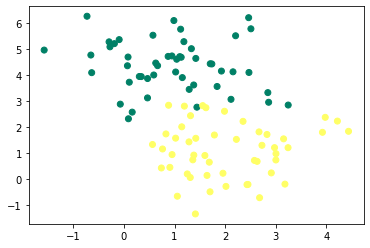

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print('dimension de X:', X.shape)
print('dimension de y:', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()



In [3]:
def initialisation(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)


In [4]:
W, b = initialisation(X)
W.shape
b.shape

(1,)

In [5]:
def model(X, W, b):
  Z = X.dot(W) + b
  A = 1/ (1 + np.exp(-Z))
  return A

In [6]:
A = model(X, W, b)
A.shape

(100, 1)

In [7]:
def log_loss(A, y):
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 -A))

In [8]:
log_loss(A, y)

2.461398047254928

In [9]:
def gradients(A, X, y):
  dW = 1 / len(y) * np.dot(X.T, A - y)
  db = 1 / len (y) * np.sum(A-y)
  return (dW, db)

In [10]:
dW, db = gradients(A, X, y)
dW.shape


(2, 1)

In [11]:
def update(dW, db, W, b, learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)

In [21]:
D = update(dW,db, W, b, 0.1)
D

(array([[ 1.52913958],
        [-1.32094803]]), array([0.13280865]))

In [35]:
def predict(X, W, b):
  A = model(X, W, b)
  print(A)
  return A >= 0.5

ASSEMBLAGE FINAL


In [13]:
from sklearn.metrics import accuracy_score

In [40]:
def artificial_neyron(X, y, learning_rate=0.1, n_iter=100):
  #initialisation W, b
  W, b = initialisation(X)

  Loss = []
  history = []

#apprentissage
  for i in range(n_iter):
    A = model(X,W,b)
    Loss.append(log_loss(A, y))
    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate)
    history.append(W, b, Loss, i)
  

#calculer la prediction pour tout les donnes X
  y_pred = predict(X, W, b)
  #print(accuracy_score(y, y_pred))

  plt.plot(Loss)
  plt.show()

  return (W, b)

  

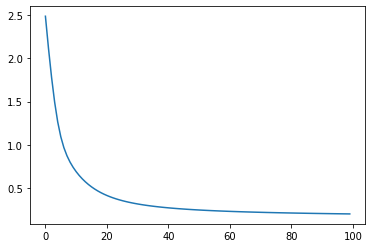

(array([[ 0.79085876],
        [-1.14191474]]), array([1.55119757]))

In [31]:
W, b = artificial_neyron(X, y)
W, b

(2,)
[-1.         -0.94949495 -0.8989899  -0.84848485 -0.7979798  -0.74747475
 -0.6969697  -0.64646465 -0.5959596  -0.54545455 -0.49494949 -0.44444444
 -0.39393939 -0.34343434 -0.29292929 -0.24242424 -0.19191919 -0.14141414
 -0.09090909 -0.04040404  0.01010101  0.06060606  0.11111111  0.16161616
  0.21212121  0.26262626  0.31313131  0.36363636  0.41414141  0.46464646
  0.51515152  0.56565657  0.61616162  0.66666667  0.71717172  0.76767677
  0.81818182  0.86868687  0.91919192  0.96969697  1.02020202  1.07070707
  1.12121212  1.17171717  1.22222222  1.27272727  1.32323232  1.37373737
  1.42424242  1.47474747  1.52525253  1.57575758  1.62626263  1.67676768
  1.72727273  1.77777778  1.82828283  1.87878788  1.92929293  1.97979798
  2.03030303  2.08080808  2.13131313  2.18181818  2.23232323  2.28282828
  2.33333333  2.38383838  2.43434343  2.48484848  2.53535354  2.58585859
  2.63636364  2.68686869  2.73737374  2.78787879  2.83838384  2.88888889
  2.93939394  2.98989899  3.04040404  3.090909

array([ True])

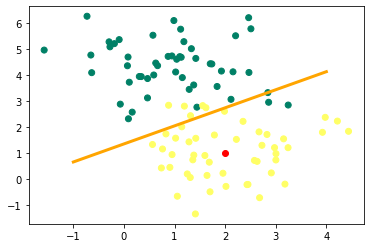

In [39]:
new_plant = np.array([2, 1])
print(new_plant.shape)
x0 = np.linspace(-1, 4, 100)
print(x0)
x1 = (-W[0]*x0 -b) / W[1]
print(x1)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw = 3)
plt.show
predict(new_plant, W, b)

**VISUALISATIONS 3D**

In [41]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()


In [42]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()